In [48]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [49]:
# # merging two csv files
# df = pd.concat(
#     map(pd.read_csv, ['reviews.csv', 'test.csv']), ignore_index=True)

# df.drop_duplicates(keep=False)
# df.to_csv('reviews.csv')

df = pd.read_csv('glassdoor_webscraped.csv')
# df.drop(columns = ['Unnamed: 0'], inplace = True)


In [50]:
df.head()

,Unnamed: 0,Unnamed: 0.1,title,author_info,rating,pros,cons,helpful
0,0,0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.,Be the first to find this review helpful
1,1,1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o...",Be the first to find this review helpful
2,2,2,Great place to work,"May 3, 2021 - Anonymous Employee",5.0,High income potential and upward mobility,"Pressure cooker, high expectations and stress ...",Be the first to find this review helpful
3,3,3,Great culture and great opportunity for growth,"May 3, 2021 - BDR in San Francisco, CA",5.0,Excellent growth and networking opportunities,Not many cons I can think of,Be the first to find this review helpful
4,4,4,Fabulous Place to Work!,"May 3, 2021 - Customer Success Guide in Denver...",5.0,"Once you’re in, you’re given the freedom and f...",Still a “startup mentality”—so keep in mind al...,Be the first to find this review helpful


In [51]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'author_info', 'rating', 'pros',
       'cons', 'helpful'],
      dtype='object')

In [52]:
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1', 'helpful'], axis = 1, inplace = True)

In [53]:
# df.to_csv('reviews.csv')

In [54]:
df.shape

(9888, 5)

In [55]:
df.isna().sum()

title            31
author_info    4759
rating            1
pros              1
cons              1
dtype: int64

In [56]:
df[df['rating'].isna() == True]

,title,author_info,rating,pros,cons
8781,NaN,NaN,NaN,NaN,NaN


In [57]:
df.drop([8780,8781], axis=0, inplace=True)

In [58]:
df.isna().sum()

title            30
author_info    4757
rating            0
pros              0
cons              0
dtype: int64

<AxesSubplot:>

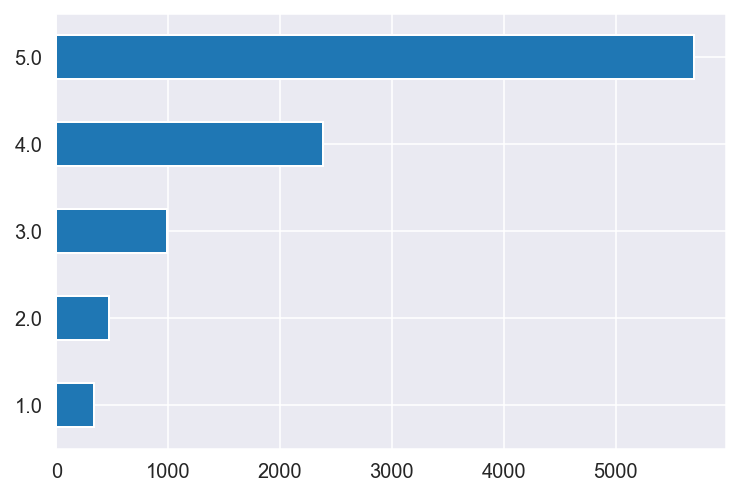

In [59]:
df['rating'].unique()
df['rating'].value_counts().sort_values().plot(kind = 'barh')

In [62]:
df_author = df.dropna()

In [67]:
df_author['author_info'].to_csv('author_info.csv')